In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import ast

In [28]:
obs = pd.read_excel("dataDU.xlsx", sheet_name="observed")
rand = pd.read_excel("dataDU.xlsx", sheet_name="random")
tags = pd.read_excel("dataDU.xlsx", sheet_name="tags")

C:\Users\majko\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [101]:
def df_matrix_cleaner(df):
    df_clean = []
    matrix = np.zeros([tags.shape[0], tags.shape[0]])

    for i, j in enumerate(tags["tag"]):
        for l, k in enumerate(tags["tag"][i+1:]):
            suma = (df.loc[(df['Tag1'] == j) & (df["Tag2"] == k)]["duration_frames"].sum() + 
                    df.loc[(df['Tag1'] == k) & (df["Tag2"] == j)]["duration_frames"].sum())
            if suma > 0:
                df_clean.append([j, k, suma])
                matrix[i,l+i+1] = suma
                matrix[l+i+1,i] = suma
                
    df_clean = pd.DataFrame(df_clean, columns=["Tag1", "Tag2", "duration_frames"])
    
    return df_clean, matrix

In [102]:
obs_clean, obs_mat = df_matrix_cleaner(obs)

In [110]:
rand_clean, rand_mat = df_matrix_cleaner(rand)

In [111]:
G_obs = nx.from_pandas_edgelist(obs_clean, source='Tag1', target='Tag2',
                            edge_attr='duration_frames')

cols = []

for node in G_obs:
    tag = tags.loc[tags["tag"] == node]["task_group"] 
    if (tag == "nurse").all():
        cols.append("lightblue")
    elif (tag == "forager").all():
        cols.append("orange")
    elif (tag == "queen").all():
        cols.append("green")

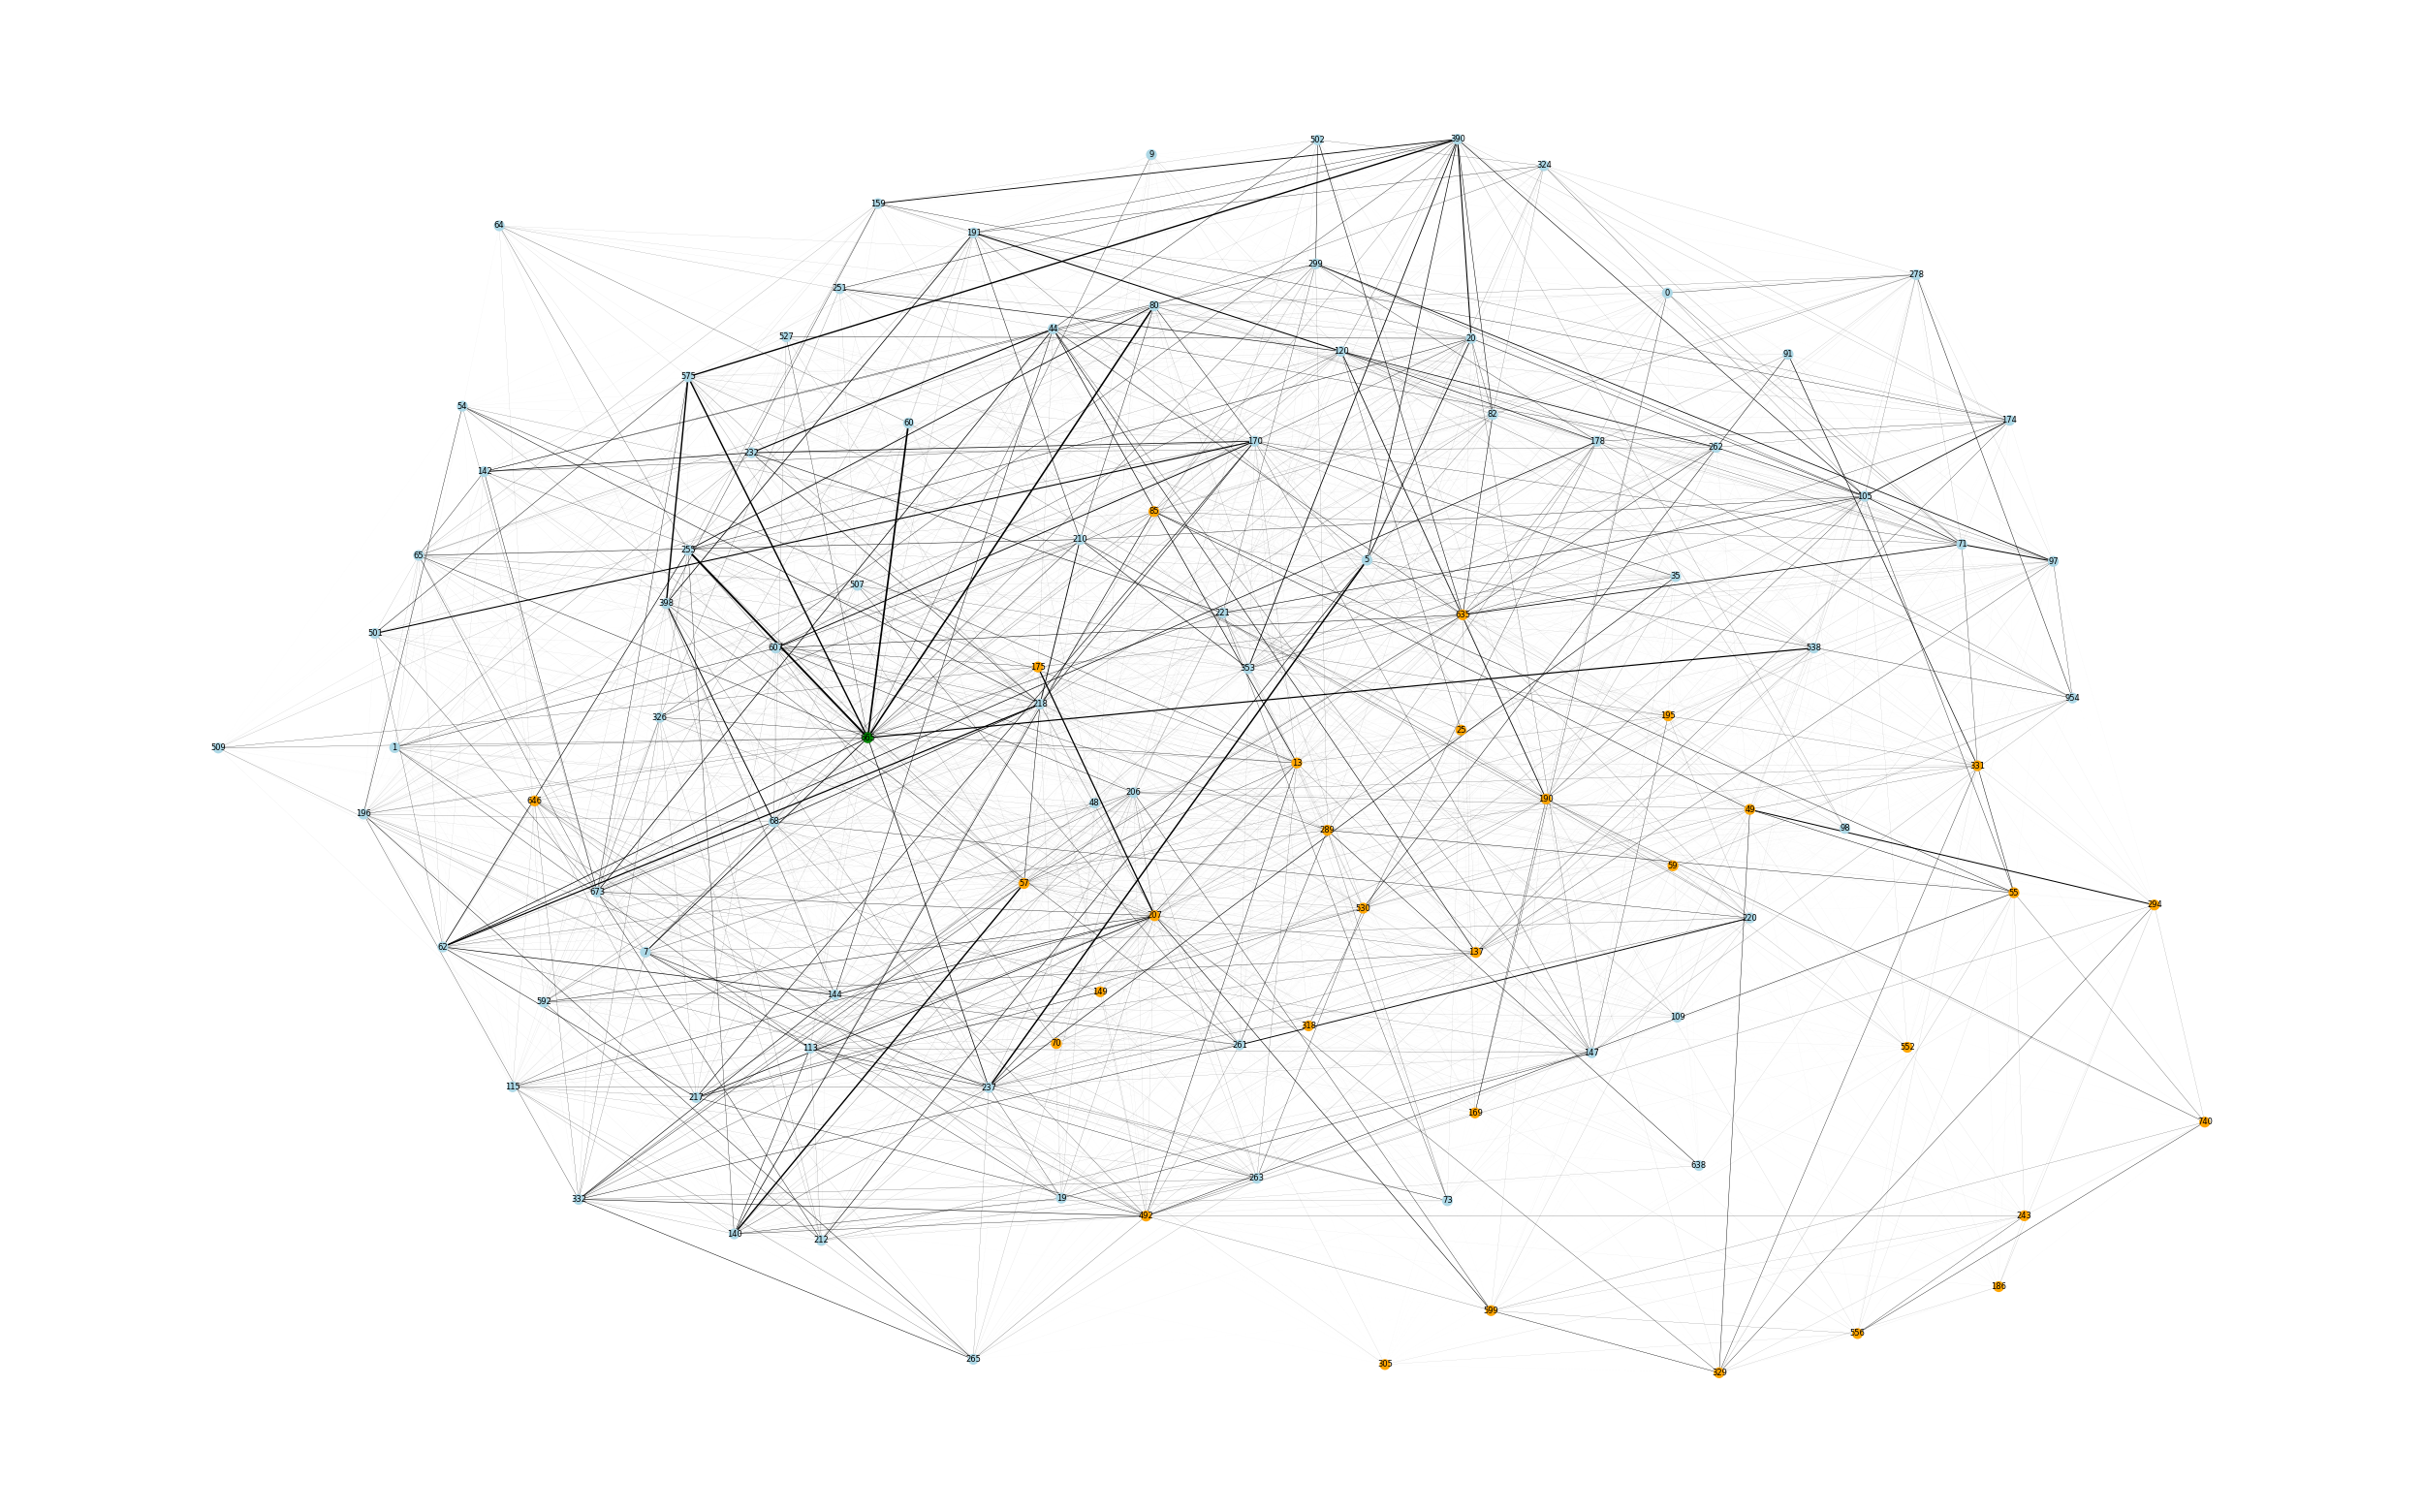

In [112]:
widths = np.array([w for *_, w in G_obs.edges.data('duration_frames')])

#pos = nx.shell_layout(G)
pos = nx.kamada_kawai_layout(G_obs)

# nodes
nx.draw_networkx_nodes(G_obs, pos, node_size=50, node_color=cols)

# edges
nx.draw_networkx_edges(G_obs, pos, width=widths/1200) 

# labels
nx.draw_networkx_labels(G_obs, pos, font_size=6, font_family="sans-serif")

#ax = plt.gca()
#ax.margins(0.08)
#plt.figure(figsize=(80, 60), dpi=500)
plt.axis("off")
#plt.tight_layout()

fig = plt.gcf()
fig.set_size_inches(32, 20)
fig.savefig('test1png.png', dpi=100)

In [113]:
G_rand = nx.from_pandas_edgelist(rand_clean, source='Tag1', target='Tag2',
                            edge_attr='duration_frames')

cols = []

for node in G_rand:
    tag = tags.loc[tags["tag"] == node]["task_group"] 
    if (tag == "nurse").all():
        cols.append("lightblue")
    elif (tag == "forager").all():
        cols.append("orange")
    elif (tag == "queen").all():
        cols.append("green")

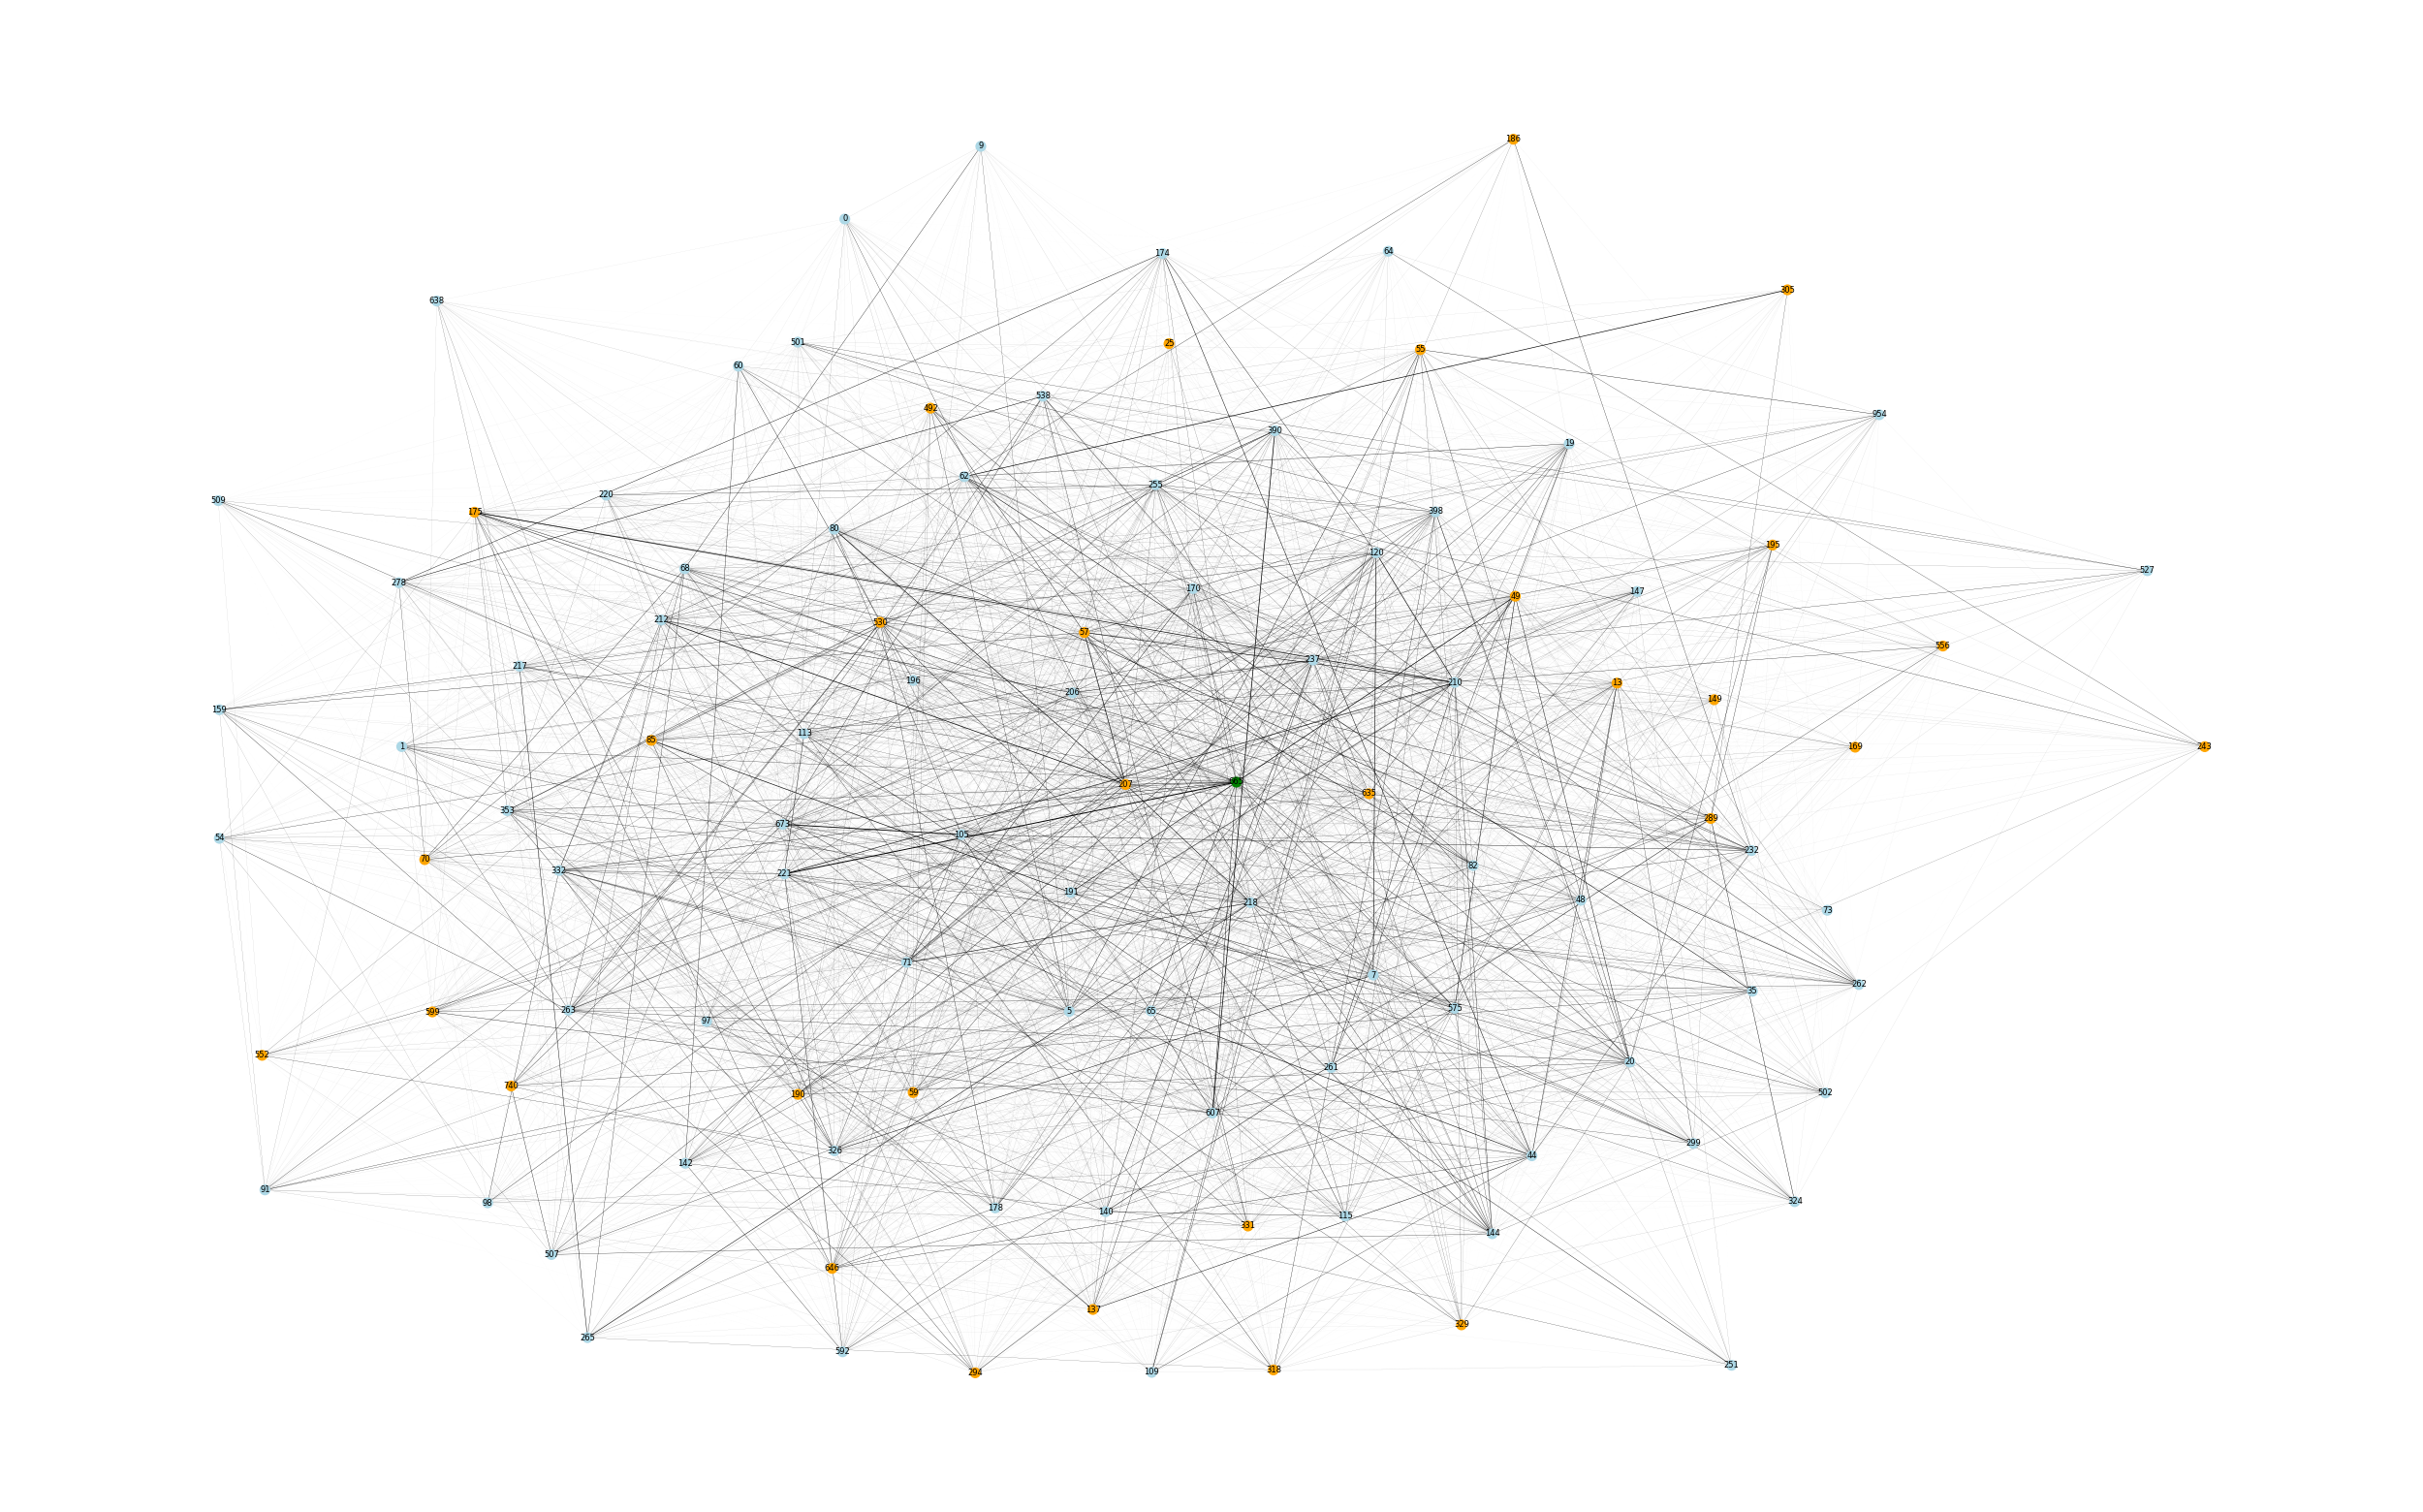

In [114]:
widths = np.array([w for *_, w in G_rand.edges.data('duration_frames')])

#pos = nx.shell_layout(G)
pos = nx.kamada_kawai_layout(G_rand)

# nodes
nx.draw_networkx_nodes(G_rand, pos, node_size=50, node_color=cols)

# edges
nx.draw_networkx_edges(G_rand, pos, width=widths/1200) 

# labels
nx.draw_networkx_labels(G_rand, pos, font_size=6, font_family="sans-serif")

#ax = plt.gca()
#ax.margins(0.08)
#plt.figure(figsize=(80, 60), dpi=500)
plt.axis("off")
#plt.tight_layout()

fig = plt.gcf()
fig.set_size_inches(32, 20)
fig.savefig('test2png.png', dpi=100)

### Priemerný stupeň vrcholu

In [120]:
print("Observed:",sum(sum(obs_mat > 0))/(105*2))
print("Random:",sum(sum(rand_mat > 0))/(105*2))

Observed: 20.83809523809524
Random: 34.78095238095238
